<a href="https://colab.research.google.com/github/denizkazici/MLHousingPricePredictions/blob/main/denizkazici.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor



In [ ]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [ ]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.duplicated().sum()

1

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [ ]:
df_copy.drop_duplicates(inplace=True)

In [ ]:
df_copy.duplicated().sum()

0

In [ ]:
df_copy.dropna(subset=['Price'], inplace=True)


In [ ]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          6441
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
YearBuilt        15163
CouncilArea          3
Lattitude         6254
Longtitude        6254
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
cat_columns = df_copy.select_dtypes(include=['object']).columns
num_columns = df_copy.select_dtypes(include=['float64', 'int64']).columns


In [ ]:
cat_columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')

In [ ]:
num_columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

In [ ]:
for column in cat_columns:
  df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

In [ ]:
for column in num_columns:
  df_copy[column].fillna(df_copy[column].mean(), inplace=True)

In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.992293e+00,0.954795,1.00000,2.000000,3.000000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.000000,870000.000000,1.295000e+06,1.120000e+07
Distance,27247.0,1.128028e+01,6.787344,0.00000,6.400000,10.500000,1.400000e+01,4.810000e+01
Postcode,27247.0,3.113796e+03,111.137636,3000.00000,3046.000000,3088.000000,3.153000e+03,3.978000e+03
Bedroom2,27247.0,3.046237e+00,0.834625,0.00000,3.000000,3.000000,3.046237e+00,2.000000e+01
Bathroom,27247.0,1.591683e+00,0.612370,0.00000,1.000000,1.591683,2.000000e+00,9.000000e+00
Car,27247.0,1.715370e+00,0.860753,0.00000,1.000000,1.715370,2.000000e+00,1.800000e+01
Landsize,27247.0,5.934889e+02,3052.302247,0.00000,351.000000,593.488933,5.934889e+02,4.330140e+05
BuildingArea,27247.0,1.568346e+02,280.922893,0.00000,156.000000,156.834586,1.568346e+02,4.451500e+04
YearBuilt,27247.0,1.966609e+03,24.481586,1196.00000,1966.609153,1966.609153,1.966609e+03,2.019000e+03


In [ ]:
df_copy.nunique()

Suburb             345
Address          26751
Rooms               12
Type                 3
Price             2871
Method               5
SellerG            349
Date                78
Distance           214
Postcode           210
Bedroom2            15
Bathroom            11
Car                 14
Landsize          1558
BuildingArea       663
YearBuilt          152
CouncilArea         33
Lattitude        11367
Longtitude       12276
Regionname           8
Propertycount      337
dtype: int64

In [ ]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

               Number of Missing Values  Ratio of Missing Values
Suburb                                0                      0.0
Address                               0                      0.0
Rooms                                 0                      0.0
Type                                  0                      0.0
Price                                 0                      0.0
Method                                0                      0.0
SellerG                               0                      0.0
Date                                  0                      0.0
Distance                              0                      0.0
Postcode                              0                      0.0
Bedroom2                              0                      0.0
Bathroom                              0                      0.0
Car                                   0                      0.0
Landsize                              0                      0.0
BuildingArea             

In [ ]:
mean_landsize = df_copy['Landsize'].mean()
std_landsize = df_copy['Landsize'].std()
z_scores_landsize = (df_copy['Landsize'] - mean_landsize) / std_landsize

z_scores_landsize

1       -0.128260
2       -0.143331
4       -0.150538
5       -0.163643
6       -0.155125
           ...   
34852   -0.000160
34853   -0.162333
34854   -0.122363
34855    0.000000
34856   -0.112534
Name: Landsize, Length: 27247, dtype: float64

In [ ]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_columns :
    print(col, check_outlier(df_copy, col))

Rooms True
Price True
Distance True
Postcode True
Bedroom2 True
Bathroom True
Car True
Landsize True
BuildingArea True
YearBuilt True
Lattitude True
Longtitude True
Propertycount True


In [ ]:
z_score_threshold = 3
for col in num_columns :
    mean = df_copy[col].mean()
    std = df_copy[col].std()
    z_scores = (df_copy[col] - mean_landsize) / std_landsize
    filtered_data = df_copy[(np.abs(z_scores) < z_score_threshold) ]

In [ ]:
df_copy = filtered_data

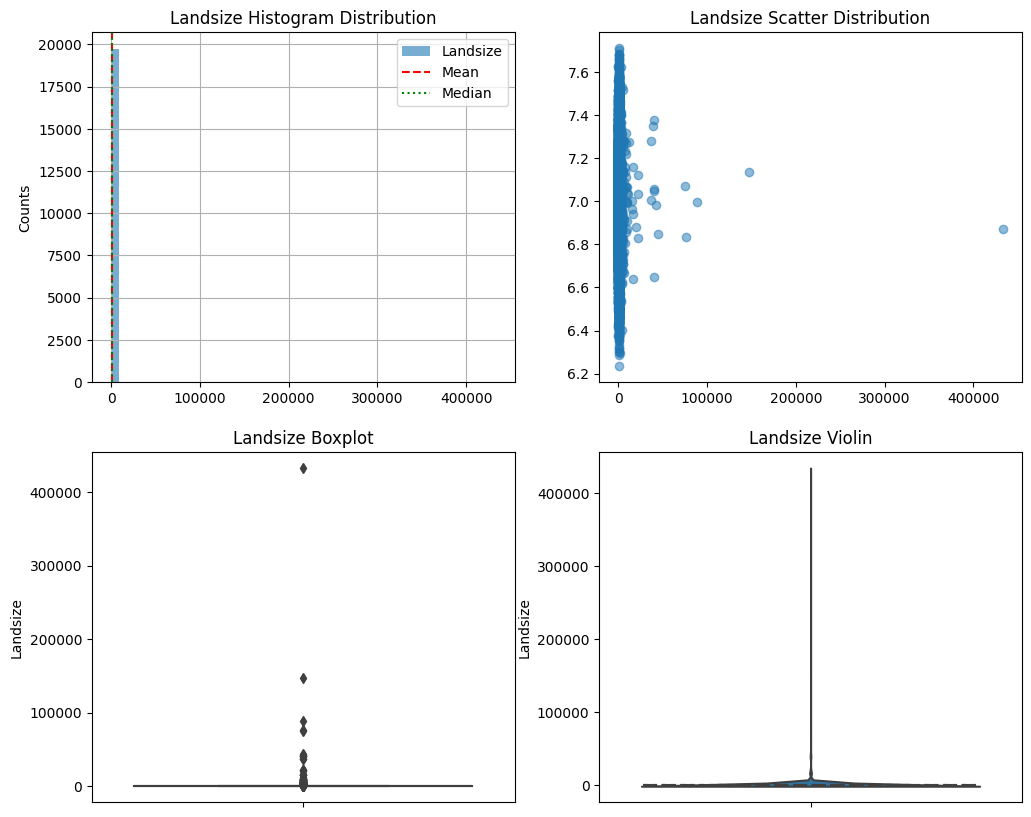

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['Landsize'].hist(bins=50, label='Landsize', alpha=0.6)
plt.axvline(np.mean(df_copy['Landsize']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['Landsize']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Landsize Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['Landsize'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("Landsize Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Landsize", data=df_copy)
plt.title("Landsize Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Landsize", data=df_copy, inner="quartile", bw=0.2)
plt.title("Landsize Violin");

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_columns:
    print(col, replace_with_thresholds(df_copy, col))

Rooms None
Price None
Distance None
Postcode None
Bedroom2 None
Bathroom None
Car None
Landsize None
BuildingArea None
YearBuilt None
Lattitude None
Longtitude None
Propertycount None


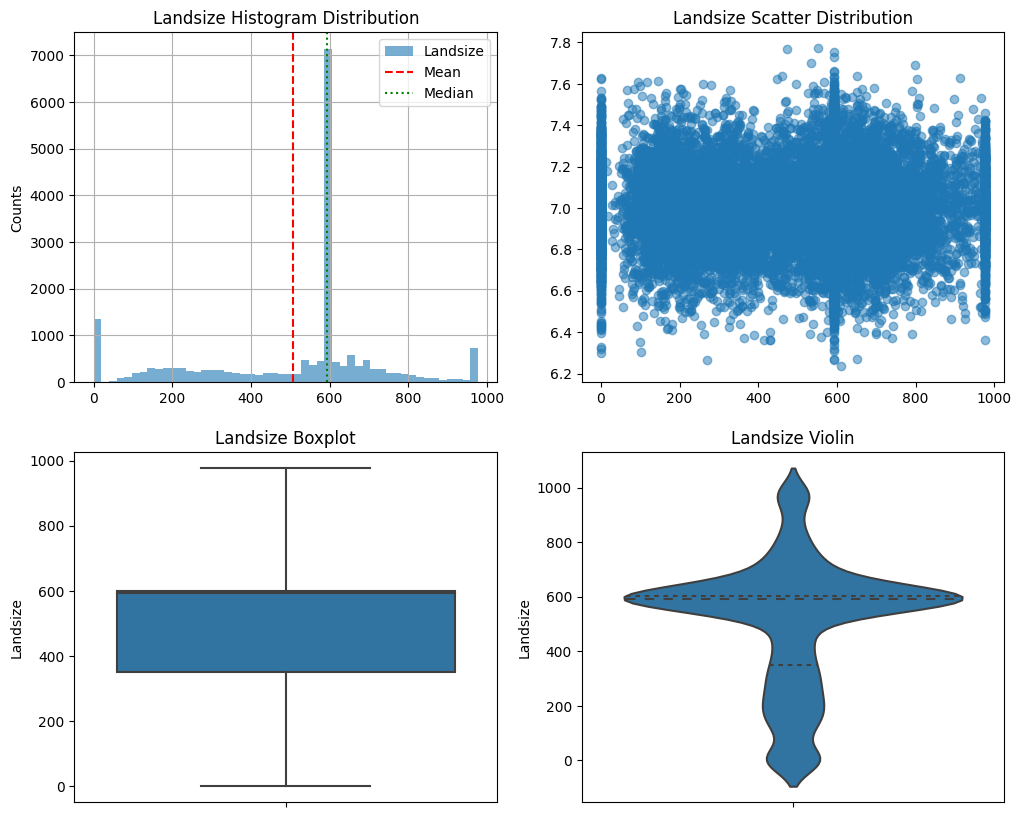

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['Landsize'].hist(bins=50, label='Landsize', alpha=0.6)
plt.axvline(np.mean(df_copy['Landsize']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['Landsize']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Landsize Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['Landsize'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("Landsize Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="Landsize", data=df_copy)
plt.title("Landsize Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="Landsize", data=df_copy, inner="quartile", bw=0.2)
plt.title("Landsize Violin");

In [ ]:
method_encoder = LabelEncoder()
df_copy['Method'] = method_encoder.fit_transform(df_copy['Method'])

In [ ]:
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,1,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,156.834586,1966.609153,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,1,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,154.748122,1966.609153,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,3,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,154.748122,1966.609153,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,0,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,156.834586,1966.609153,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,4,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,154.748122,1966.609153,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df_copy = pd.get_dummies(df_copy, columns=['Date'], drop_first=True)

In [ ]:
df_copy = pd.get_dummies(df_copy, columns=['SellerG'], drop_first=True)

In [ ]:
type_encoder = LabelEncoder()
df_copy['Type'] = type_encoder.fit_transform(df_copy['Type'])

In [ ]:
CouncilArea_encoder = LabelEncoder()
df_copy['CouncilArea'] = type_encoder.fit_transform(df_copy['CouncilArea'])

In [ ]:
Regionname_encoder = LabelEncoder()
df_copy['Regionname'] = type_encoder.fit_transform(df_copy['Regionname'])

In [ ]:
df_copy = pd.get_dummies(df_copy, columns=['Suburb'], drop_first=True)

In [ ]:
df_copy.drop('Address', axis=1, inplace=True)


In [ ]:
scaler = StandardScaler()
df_copy[num_columns] = scaler.fit_transform(df_copy[num_columns])

In [ ]:
Y = df_copy["Price"]
X = df_copy.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [ ]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (15819, 711)
Shape of x_test is (3955, 711)
Shape of y_train is (15819,)
Shape of y_test is (3955,)


In [ ]:
models = [('Lasso', Lasso()),
          ('LinearRegression', LinearRegression()),
          ('Ridge', Ridge()),
          ('ElasticNet', ElasticNet()),
          ('KNeighborsRegressor', KNeighborsRegressor()),
          ('RandomForestRegressor', RandomForestRegressor()),
          ('GradientBoostingRegressor', GradientBoostingRegressor()),
          ('AdaBoostRegressor', AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)),]

In [ ]:
for name, model in models:
    cv_results = cross_validate(model, X, Y, cv=10, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], return_train_score=True)
    print(f'########## {name} ##########')
    print(f'Mean Absolute Error: {round(-cv_results["test_neg_mean_absolute_error"].mean(), 4)}')
    print(f'Mean Squared Error: {round(-cv_results["test_neg_mean_squared_error"].mean(), 4)}')
    print(f'R-squared: {round(cv_results["test_r2"].mean(), 4)}')


########## Lasso ##########
Mean Absolute Error: 0.8053
Mean Squared Error: 1.0039
R-squared: -0.0181
########## LinearRegression ##########
Mean Absolute Error: 177570078.801
Mean Squared Error: 2.775786102285236e+17
R-squared: -2.893131882681412e+17
########## Ridge ##########
Mean Absolute Error: 0.3657
Mean Squared Error: 0.2377
R-squared: 0.7569
########## ElasticNet ##########
Mean Absolute Error: 0.8055
Mean Squared Error: 1.002
R-squared: -0.0163
########## KNeighborsRegressor ##########
Mean Absolute Error: 0.3559
Mean Squared Error: 0.2471
R-squared: 0.7478
########## RandomForestRegressor ##########
Mean Absolute Error: 0.2949
Mean Squared Error: 0.1843
R-squared: 0.8119
########## GradientBoostingRegressor ##########
Mean Absolute Error: 0.3323
Mean Squared Error: 0.2141
R-squared: 0.7813
########## AdaBoostRegressor ##########
Mean Absolute Error: 0.5009
Mean Squared Error: 0.4083
R-squared: 0.5817
